In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [32]:
#โหลดข้อมูล
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.447842,0.668159,1.222700e-07,0.485885,0.547461,0.033641,0.523742,0.447441,0.007130,0.558620,...,0.604783,0.709838,-0.144324,0.571961,0.724190,-0.112613,0.539052,0.715339,-0.104079,right
1,0.461959,0.758672,4.970562e-08,0.458363,0.691590,-0.025126,0.490158,0.612235,-0.035576,0.532844,...,0.567229,0.780185,-0.060981,0.538189,0.769340,-0.059593,0.518336,0.759835,-0.051928,right
2,0.435448,0.744758,3.481213e-09,0.430816,0.685460,-0.013393,0.455962,0.618497,-0.017844,0.491476,...,0.516049,0.730261,-0.042196,0.489475,0.727829,-0.038961,0.471707,0.725004,-0.031304,right
3,0.425417,0.702587,-4.401205e-08,0.414383,0.637448,-0.024531,0.441006,0.548715,-0.037952,0.481326,...,0.502482,0.701394,-0.067189,0.466833,0.697378,-0.059607,0.460768,0.695143,-0.046958,right
4,0.322641,0.582385,-5.341082e-08,0.384853,0.454995,0.035852,0.467155,0.411432,0.017400,0.532765,...,0.525773,0.656971,-0.121051,0.484931,0.665614,-0.085156,0.453761,0.639988,-0.072397,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,0.573392,0.341176,-9.143288e-07,0.527353,0.375241,-0.049824,0.490351,0.412893,-0.086498,0.483180,...,0.607307,0.481561,-0.099859,0.590947,0.540373,-0.091735,0.574494,0.580854,-0.084428,setting
2318,0.589329,0.282093,3.043317e-07,0.631906,0.355220,-0.037127,0.645766,0.434661,-0.073760,0.637453,...,0.550752,0.511971,-0.103291,0.565731,0.514137,-0.072785,0.571930,0.498955,-0.050950,setting
2319,0.473855,0.398355,1.495968e-07,0.527849,0.452280,-0.052124,0.546177,0.555168,-0.086818,0.530782,...,0.426742,0.664051,-0.093023,0.450637,0.678035,-0.084943,0.461695,0.667688,-0.078518,setting
2320,0.582749,0.150324,9.879141e-07,0.536482,0.191852,-0.081712,0.522002,0.284382,-0.133506,0.537245,...,0.665360,0.407473,-0.119872,0.637512,0.427489,-0.118717,0.624218,0.432254,-0.119138,setting


In [33]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.447842,0.668159,1.222700e-07,0.485885,0.547461,0.033641,0.523742,0.447441,0.007130,0.558620,...,0.604783,0.709838,-0.144324,0.571961,0.724190,-0.112613,0.539052,0.715339,-0.104079,right
1,0.461959,0.758672,4.970562e-08,0.458363,0.691590,-0.025126,0.490158,0.612235,-0.035576,0.532844,...,0.567229,0.780185,-0.060981,0.538189,0.769340,-0.059593,0.518336,0.759835,-0.051928,right
2,0.435448,0.744758,3.481213e-09,0.430816,0.685460,-0.013393,0.455962,0.618497,-0.017844,0.491476,...,0.516049,0.730261,-0.042196,0.489475,0.727829,-0.038961,0.471707,0.725004,-0.031304,right
3,0.425417,0.702587,-4.401205e-08,0.414383,0.637448,-0.024531,0.441006,0.548715,-0.037952,0.481326,...,0.502482,0.701394,-0.067189,0.466833,0.697378,-0.059607,0.460768,0.695143,-0.046958,right
4,0.322641,0.582385,-5.341082e-08,0.384853,0.454995,0.035852,0.467155,0.411432,0.017400,0.532765,...,0.525773,0.656971,-0.121051,0.484931,0.665614,-0.085156,0.453761,0.639988,-0.072397,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,0.573392,0.341176,-9.143288e-07,0.527353,0.375241,-0.049824,0.490351,0.412893,-0.086498,0.483180,...,0.607307,0.481561,-0.099859,0.590947,0.540373,-0.091735,0.574494,0.580854,-0.084428,setting
2318,0.589329,0.282093,3.043317e-07,0.631906,0.355220,-0.037127,0.645766,0.434661,-0.073760,0.637453,...,0.550752,0.511971,-0.103291,0.565731,0.514137,-0.072785,0.571930,0.498955,-0.050950,setting
2319,0.473855,0.398355,1.495968e-07,0.527849,0.452280,-0.052124,0.546177,0.555168,-0.086818,0.530782,...,0.426742,0.664051,-0.093023,0.450637,0.678035,-0.084943,0.461695,0.667688,-0.078518,setting
2320,0.582749,0.150324,9.879141e-07,0.536482,0.191852,-0.081712,0.522002,0.284382,-0.133506,0.537245,...,0.665360,0.407473,-0.119872,0.637512,0.427489,-0.118717,0.624218,0.432254,-0.119138,setting


In [34]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (2322, 63)
Labels shape = (2322,)


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [36]:
# SVM Parameter Grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Random Forest Parameter Grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# KNN Parameter Grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# MLP Parameter Grid
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300, 500]
}

In [37]:
#SVM
svm = SVC()
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=2)
grid_search_svm.fit(x_train, y_train)
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(x_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.

In [38]:
#Random Forest
rf = RandomForestClassifier(random_state=0)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=2)
grid_search_rf.fit(x_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_de

In [39]:
#K-Nearest Neighbors
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=2)
grid_search_knn.fit(x_train, y_train)
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, we

In [40]:
#Neural Network mlp
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=0)
mlp.fit(x_train, y_train)
y_pred_mlp = mlp.predict(x_test)

In [41]:
#วัดผลโมเดลแต่ละตัว
def evaluate_model(y_true, y_pred, model_name):
    accuracy = round(accuracy_score(y_true, y_pred), 3)
    f1 = round(f1_score(y_true, y_pred, average='micro'), 3)
    recall = round(recall_score(y_true, y_pred, average='micro'), 3)
    precision = round(precision_score(y_true, y_pred, average='micro'), 3)
    
    print(f"{model_name} Accuracy: {accuracy:.3f}")
    print(f"{model_name} F1-score: {f1:.3f}")
    print(f"{model_name} Recall: {recall:.3f}")
    print(f"{model_name} Precision: {precision:.3f}")

In [42]:
#ประเมินผล
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "KNN")
evaluate_model(y_test, y_pred_mlp, "Neural Network (MLP)")

SVM Accuracy: 0.994
SVM F1-score: 0.994
SVM Recall: 0.994
SVM Precision: 0.994
Random Forest Accuracy: 0.994
Random Forest F1-score: 0.994
Random Forest Recall: 0.994
Random Forest Precision: 0.994
KNN Accuracy: 0.989
KNN F1-score: 0.989
KNN Recall: 0.989
KNN Precision: 0.989
Neural Network (MLP) Accuracy: 0.994
Neural Network (MLP) F1-score: 0.994
Neural Network (MLP) Recall: 0.994
Neural Network (MLP) Precision: 0.994


In [43]:
#Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cf_matrix = confusion_matrix(y_test, y_pred)
    labels = sorted(list(set(df['Output'])))
    labels = [x.upper() for x in labels]

    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_title(f"Confusion Matrix - {model_name}")

    maping = sns.heatmap(cf_matrix, 
                         annot=True,
                         cmap=plt.cm.Blues, 
                         linewidths=.2,
                         xticklabels=labels,
                         yticklabels=labels, vmax=8,
                         fmt='g',
                         ax=ax)
    plt.show()

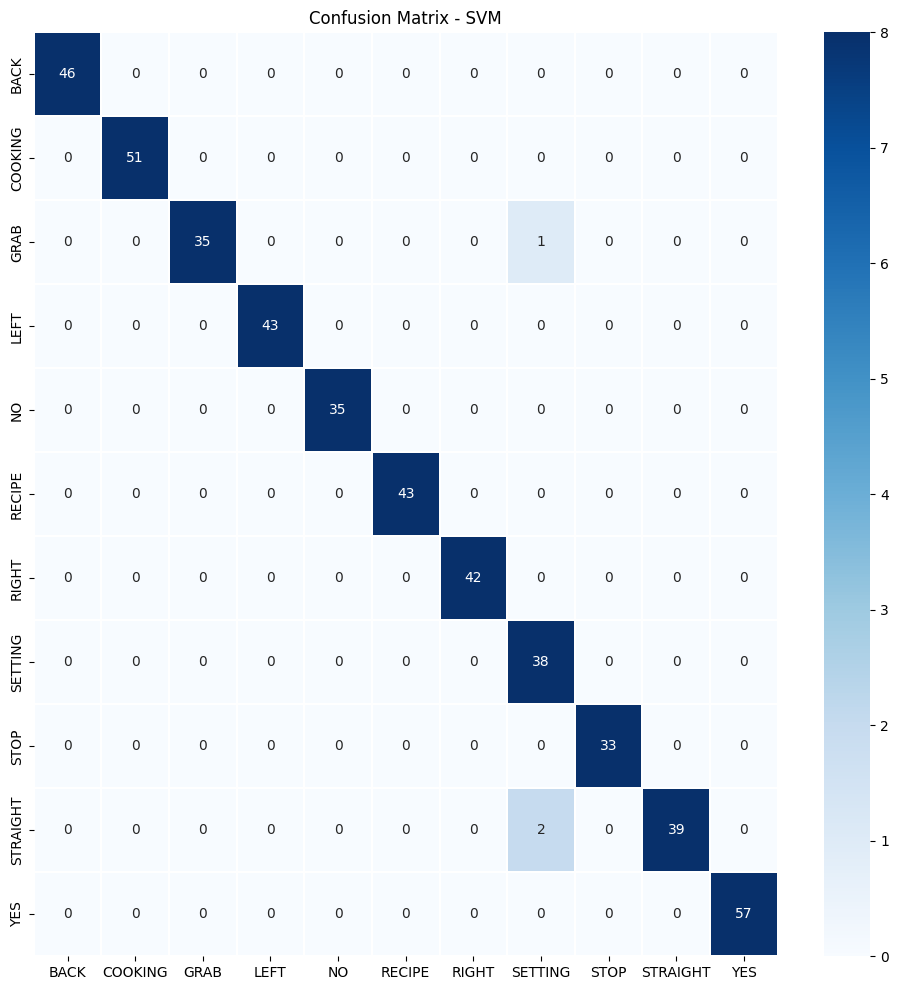

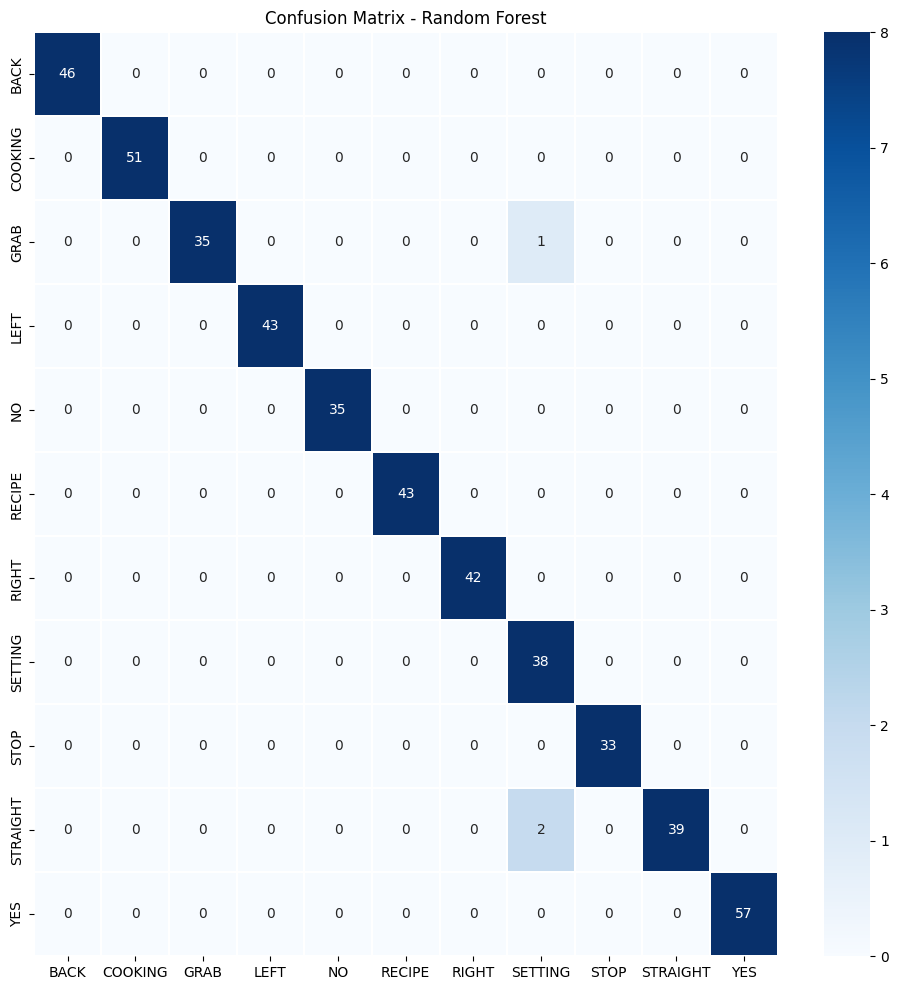

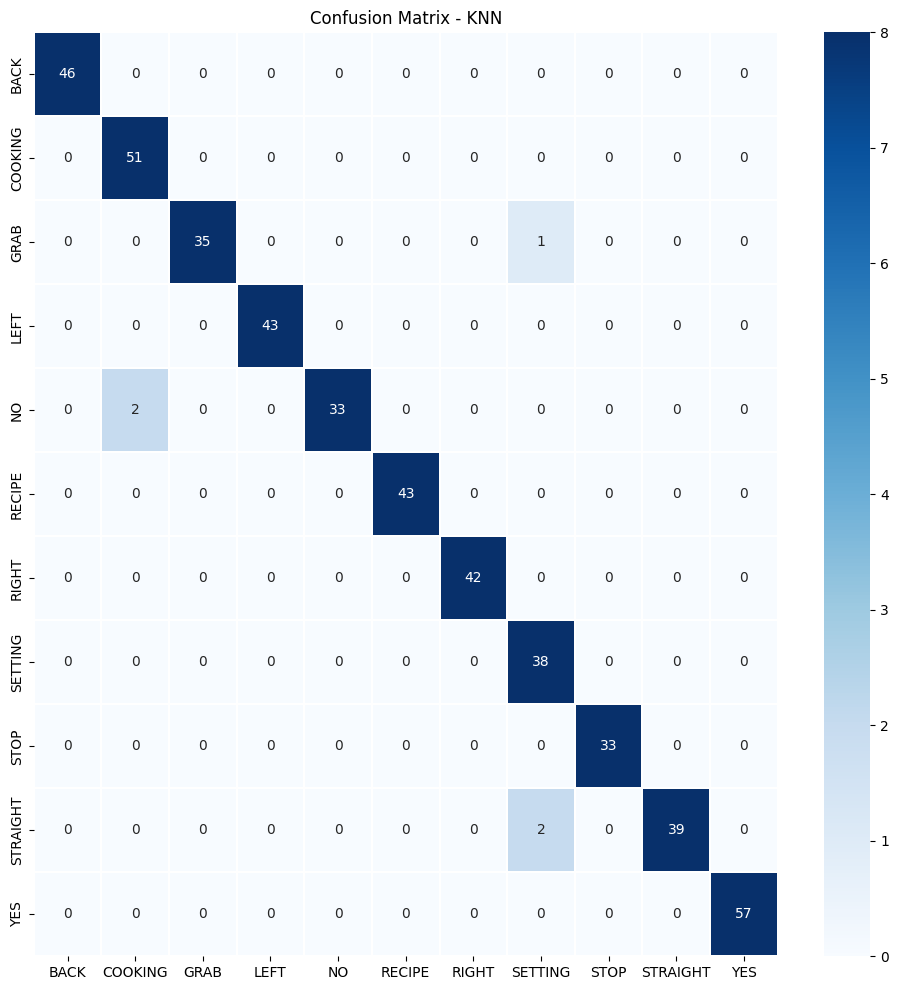

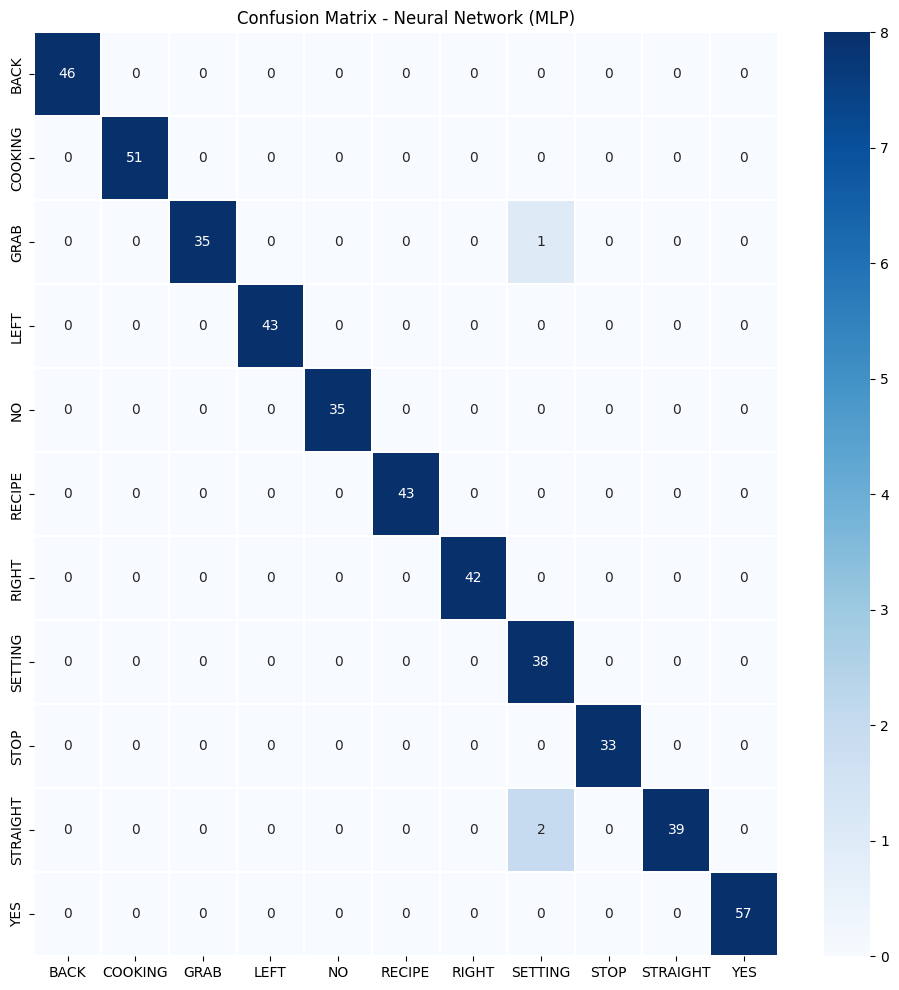

In [44]:
#Confusion Matrix
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_knn, "KNN")
plot_confusion_matrix(y_test, y_pred_mlp, "Neural Network (MLP)")

In [45]:
with open('svm_model.pkl','wb') as f:
    pickle.dump(svm,f)

with open('rf_model.pkl','wb') as f:
    pickle.dump(rf,f)

with open('knn_model.pkl','wb') as f:
    pickle.dump(knn,f)

with open('mlp_model.pkl','wb') as f:
    pickle.dump(mlp,f)